In [12]:
import torch
from torch.utils.data import Dataset

Make a sample dataset:

In [4]:
class toy_set(Dataset):
    def __init__(self, length=100,transform=None):
        self.x = 2*torch.ones(length,2)
        self.y = torch.ones(length,1)
        
        self.len = length
        self.transform = transform
    
    def __getitem__(self, index):
        sample = self.x[index], self.y[index]
        if self.transform:
            sample = self.transform(sample)
        return sample
    
    def __len__(self):
        return self.len

In [10]:
dataset = toy_set()

In [11]:
for i in range(3):
    x,y = dataset[i]
    print(i, 'x: ', x, 'y: ',y)

0 x:  tensor([2., 2.]) y:  tensor([1.])
1 x:  tensor([2., 2.]) y:  tensor([1.])
2 x:  tensor([2., 2.]) y:  tensor([1.])


<h3> Transforms in Pytorch </h3>
- we'll create a class so that all transforms are classes and they must overwrite the call method

In [20]:
# here, we create a transform object
class add_mult(object):
    def __init__(self, addx=1, muly=1):
        self.addx = addx
        self.muly = muly
    
    def __call__(self, sample):
        x = sample[0]
        y = sample[1]
        x = x+self.addx
        y = y*self.muly
        sample = x,y
        return sample

In [21]:
a_m = add_mult()
x_, y_ = a_m(dataset[0])
x_, y_

(tensor([3., 3.]), tensor([1.]))

And then when we want to transform our dataset, we set the transform equal to our transform object

In [24]:
a_m = add_mult()
dataset_ = toy_set(transform = a_m)

In [25]:
for i in range(3):
    x,y = dataset_[i]
    print(i, 'x: ', x, 'y: ',y)

0 x:  tensor([3., 3.]) y:  tensor([1.])
1 x:  tensor([3., 3.]) y:  tensor([1.])
2 x:  tensor([3., 3.]) y:  tensor([1.])


<h3> Compose Transforms </h3>

In [27]:
from torchvision import transforms

In [28]:
# making a 2nd transform object:
class mult(object):
    def __init__(self, mul=100):
        self.mul = mul
    
    def __call__(self, sample):
        x=sample[0]
        y = sample[1]
        x = x*self.mul
        y = y*self.mul
        sample = x, y
        return sample

In [29]:
# composing the transforms:
data_transform = transforms.Compose([add_mult(), mult()])

In [30]:
# applying the transform to our dataset:
dataset_transform = toy_set(transform = data_transform)

In [32]:
for i in range(3):
    x,y = dataset_transform[i]
    print(i, 'x: ', x, 'y: ',y)

0 x:  tensor([300., 300.]) y:  tensor([100.])
1 x:  tensor([300., 300.]) y:  tensor([100.])
2 x:  tensor([300., 300.]) y:  tensor([100.])


<h3> Applying Transforms to Pre-Built MNIST Dataset: </h3>

In [42]:
import torch 
import matplotlib.pylab as plt
import numpy as np
torch.manual_seed(0)

import torchvision.transforms as transforms
import torchvision.datasets as dsets

In [67]:
dataset = dsets.MNIST(
    root = './data',
    train = False, 
    download = True,
    transform = transforms.ToTensor())

In [38]:
print("Type of the first element: ", type(dataset[0]))
print("The length of the tuple: ", len(dataset[0]))
print("The shape of the first element in the tuple: ", dataset[0][0].shape)
print("The type of the first element in the tuple", type(dataset[0][0]))
print("The second element in the tuple: ", dataset[0][1])
print("The type of the second element in the tuple: ", type(dataset[0][1]))
print("As the result, the structure of the first elementin the dataset is (tensor([1, 28, 28]), tensor(7)).")

Type of the first element:  <class 'tuple'>
The length of the tuple:  2
The shape of the first element in the tuple:  torch.Size([1, 28, 28])
The type of the first element in the tuple <class 'torch.Tensor'>
The second element in the tuple:  tensor(7)
The type of the second element in the tuple:  <class 'torch.Tensor'>
As the result, the structure of the first elementin the dataset is (tensor([1, 28, 28]), tensor(7)).


In [59]:
# function to show data:

def show_data(data_sample, shape = (28, 28)):
    plt.imshow(data_sample[0].numpy().reshape(shape), cmap='gray')
    plt.title('y = ' + str(data_sample[1].item()))

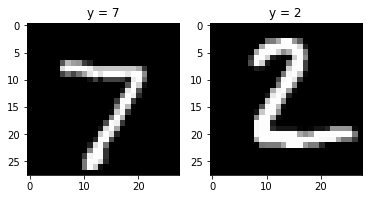

In [68]:
plt.subplot(1, 2, 1)
show_data(dataset[0])

plt.subplot(1, 2, 2)
show_data(dataset[1])

Now, we'll apply two transforms but combining them together; cropping the image and converting it to a tensor:

In [69]:
croptensor_data_transform = transforms.Compose([transforms.CenterCrop(20), transforms.ToTensor()])
dataset = dsets.MNIST(root = './data', train = False, download = True, transform = croptensor_data_transform)
print("The shape of the first element in the first tuple: ", dataset[0][0].shape)


The shape of the first element in the first tuple:  torch.Size([1, 20, 20])


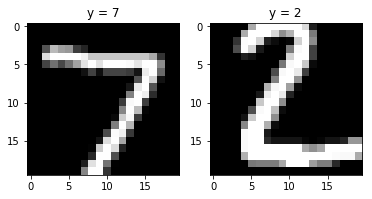

In [57]:
plt.subplot(1, 2, 1)
show_data(dataset[0], shape = (20,20))

plt.subplot(1, 2, 2)
show_data(dataset[1], shape = (20,20))

Here, instead of cropping we'll flip it vertically and horizontally:

In [64]:
fliptensor_data_transform = transforms.Compose([transforms.RandomVerticalFlip(p = 1), transforms.RandomHorizontalFlip(p = 1),transforms.ToTensor()])
dataset = dsets.MNIST(root = './data', train = False, download = True, transform = fliptensor_data_transform)



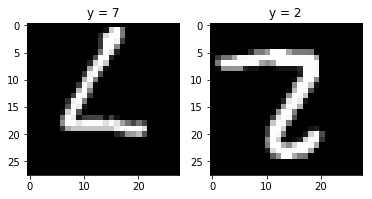

In [65]:
plt.subplot(1, 2, 1)
show_data(dataset[0])

plt.subplot(1, 2, 2)
show_data(dataset[1])